# Data Analyse in Python 1

USA goverment opened a dataset which collected from anonymous users. You can download the data from [here](http://1usagov.measuredvoice.com/2013/)(They have shut down this service on the official website since 2016).

Unpack the data and put it under your working folder.

## Obtaining data

In [6]:
import json
%matplotlib inline

In [7]:
path = 'usagov_bitly_data2013-05-17-1368832207'

In [8]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Linux; U; Android 4.1.2; en-us; HTC_PN071 Build\\/JZO54K) AppleWebKit\\/534.30 (KHTML, like Gecko) Version\\/4.0 Mobile Safari\\/534.30", "c": "US", "nk": 0, "tz": "America\\/Los_Angeles", "gr": "CA", "g": "15r91", "h": "10OBm3W", "l": "pontifier", "al": "en-US", "hh": "j.mp", "r": "direct", "u": "http:\\/\\/www.nsa.gov\\/", "t": 1368832205, "hc": 1365701422, "cy": "Anaheim", "ll": [ 33.816101, -117.979401 ] }\n'

The data is saved in json format. In python you have packages to deal with different format of data. Here **json** is required

In [9]:
records = [json.loads(line) for line in open(path)]

In [10]:
records[0]

{'a': 'Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; HTC_PN071 Build/JZO54K) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30',
 'al': 'en-US',
 'c': 'US',
 'cy': 'Anaheim',
 'g': '15r91',
 'gr': 'CA',
 'h': '10OBm3W',
 'hc': 1365701422,
 'hh': 'j.mp',
 'l': 'pontifier',
 'll': [33.816101, -117.979401],
 'nk': 0,
 'r': 'direct',
 't': 1368832205,
 'tz': 'America/Los_Angeles',
 'u': 'http://www.nsa.gov/'}

You can access the data with index and keyword.

For example, accessing the timezone with keyword 'tz'.

In [11]:
records[0]['tz']

'America/Los_Angeles'

## Simple Count for Timezone with plain Python

Assume we want to know which timezone appears most.

In [12]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [13]:
time_zones[:10]

['America/Los_Angeles',
 '',
 'America/Phoenix',
 'America/Chicago',
 '',
 'America/Indianapolis',
 'America/Chicago',
 '',
 'Australia/NSW',
 '']

In [14]:
#version 1
def get_counts(data):
    counts = {}
    for d in data:
        if d in counts:
            counts[d] += 1
            
        else:
            counts[d] = 1          
    return counts

# version 2
from collections import defaultdict

def get_counts2(data):
    counts = defaultdict(int)
    for d in data:
        counts[d] += 1
    return counts


In [15]:
counts = get_counts(time_zones)

In [16]:
counts['America/New_York']

903

In [17]:
len(counts)

111

Write a function to get the top N

In [18]:
def top_count(counts, n=3):
    pairs = [(v, k) for k, v in counts.items()]
    pairs.sort()
    
    return pairs[-n:]

In [19]:
top_count(counts, 10)

[(40, 'America/Phoenix'),
 (50, 'America/Indianapolis'),
 (85, 'Europe/London'),
 (89, 'America/Denver'),
 (102, 'Asia/Tokyo'),
 (184, 'America/Puerto_Rico'),
 (421, 'America/Los_Angeles'),
 (636, ''),
 (686, 'America/Chicago'),
 (903, 'America/New_York')]

Make the counting simpler by using **collection.Counter**

In [20]:
from collections import Counter
counts = Counter(time_zones)

In [21]:
counts.most_common(10)

[('America/New_York', 903),
 ('America/Chicago', 686),
 ('', 636),
 ('America/Los_Angeles', 421),
 ('America/Puerto_Rico', 184),
 ('Asia/Tokyo', 102),
 ('America/Denver', 89),
 ('Europe/London', 85),
 ('America/Indianapolis', 50),
 ('America/Phoenix', 40)]

## Simple Count with Pandas

Make it more simpler using DataFrame of Pandas

In [22]:
from pandas import DataFrame, Series
import pandas as pd; import numpy as np

In [23]:
frame = DataFrame(records)
frame.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; H...,en-US,US,Anaheim,15r91,CA,10OBm3W,1.365701e+09,j.mp,NaN,pontifier,"[33.816101, -117.979401]",0.0,direct,1.368832e+09,America/Los_Angeles,http://www.nsa.gov/
1,NaN,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,en-us,None,NaN,ifIpBW,NaN,ifIpBW,1.302189e+09,1.usa.gov,NaN,bitly,NaN,0.0,http://www.usa.gov/,1.368832e+09,,http://answers.usa.gov/system/selfservice.cont...
2,NaN,Mozilla/5.0 (Windows NT 6.1; rv:21.0) Gecko/20...,"en-US,en;q=0.5",US,Fort Huachuca,10DaxOu,AZ,10DaxOt,1.368815e+09,1.usa.gov,NaN,jaxstrong,"[31.5273, -110.360703]",1.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.368832e+09,America/Phoenix,http://www.saj.usace.army.mil/Media/NewsReleas...
3,NaN,Mozilla/5.0 (Linux; U; Android 4.1.2; en-us; S...,en-US,US,Houston,TysVFU,TX,TChsoQ,1.354719e+09,1.usa.gov,NaN,o_5004fs3lvd,"[29.7633, -95.363297]",1.0,http://m.facebook.com/l.php?u=http%3A%2F%2F1.u...,1.368832e+09,America/Chicago,https://nationalregistry.fmcsa.dot.gov/
4,NaN,Opera/9.80 (Android; Opera Mini/7.5.33286/29.3...,en,None,NaN,10IGW7m,NaN,10IGW7l,1.368738e+09,1.usa.gov,NaN,peacecorps,NaN,0.0,http://t.co/CDO9hLTtNT,1.368832e+09,,http://www.peacecorps.gov/learn/howvol/ab530gr...


In [24]:
frame['tz'][:10]

0     America/Los_Angeles
1                        
2         America/Phoenix
3         America/Chicago
4                        
5    America/Indianapolis
6         America/Chicago
7                        
8           Australia/NSW
9                        
Name: tz, dtype: object

The return of `frame['tz']` is a Series object. It has a value_counts method.

In [25]:
tz_counts = frame['tz'].value_counts()

In [26]:
tz_counts[:10]

America/New_York        903
America/Chicago         686
                        636
America/Los_Angeles     421
America/Puerto_Rico     184
Asia/Tokyo              102
America/Denver           89
Europe/London            85
America/Indianapolis     50
America/Phoenix          40
Name: tz, dtype: int64

Use `.fillna` to get rid of NaN, and use the string 'Unknown' to replace the empty value ''.

In [27]:
clean_tz = frame['tz'].fillna('Missing')

In [28]:
clean_tz[clean_tz == ''] = "Unknown"

In [29]:
tz_counts = clean_tz.value_counts()

In [30]:
tz_counts[:10]

America/New_York        903
America/Chicago         686
Unknown                 636
America/Los_Angeles     421
America/Puerto_Rico     184
Missing                 120
Asia/Tokyo              102
America/Denver           89
Europe/London            85
America/Indianapolis     50
Name: tz, dtype: int64

Plot a bar diagram using the top 10

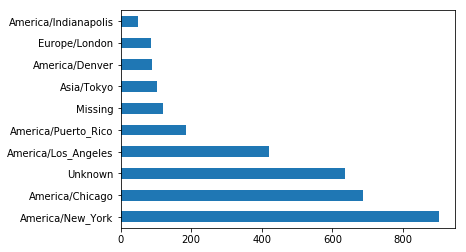

In [50]:
tz_counts[:10].plot(kind='barh', rot=0)

## Count the operating system

The column **'a'** represents the operating system the user takes.

In [32]:
frame['a'][2]

'Mozilla/5.0 (Windows NT 6.1; rv:21.0) Gecko/20100101 Firefox/21.0'

`.dropna()` is to drop the NaN rows.

In [33]:
results = Series(x.split()[0] for x in frame.a.dropna())

List the first 5 OS

In [34]:
results[:5]

0    Mozilla/5.0
1    Mozilla/4.0
2    Mozilla/5.0
3    Mozilla/5.0
4     Opera/9.80
dtype: object

Get the top 5 OS most used

In [35]:
results.value_counts()[:5]

Mozilla/5.0           3251
Mozilla/4.0            322
CakePHP                 38
ShortLinkTranslate      36
TVersity                30
dtype: int64

Get the frame without NaN rows in column 'a'

In [127]:
cframe = frame[frame.a.notnull()]

Calculate an index to indicate wether the OS is windows

In [81]:
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

print(operating_system[:10])

['Not Windows' 'Windows' 'Windows' 'Not Windows' 'Not Windows' 'Windows'
 'Windows' 'Not Windows' 'Not Windows' 'Windows']


Group the data with the OS index

In [122]:
by_tz_os = cframe.groupby(['tz', operating_system])

unstack and fillna

In [133]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head(10)

,Not Windows,Windows
tz,,
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,4.0,2.0
Africa/Gaborone,0.0,1.0
Africa/Johannesburg,2.0,0.0
America/Anchorage,5.0,3.0
America/Argentina/Buenos_Aires,4.0,7.0
America/Argentina/Catamarca,1.0,0.0
America/Argentina/Cordoba,0.0,2.0


make sum of the 

In [151]:
indexer = agg_counts.sum(1).argsort()

sort the agg_counts with the indexer

In [154]:
count_subset = agg_counts.take(indexer)[-10:]

In [155]:
count_subset

,Not Windows,Windows
tz,,
America/Phoenix,22.0,18.0
America/Indianapolis,29.0,21.0
Europe/London,62.0,23.0
America/Denver,41.0,48.0
Asia/Tokyo,88.0,14.0
America/Puerto_Rico,93.0,91.0
America/Los_Angeles,207.0,214.0
DADS,484.0,152.0
America/Chicago,343.0,343.0


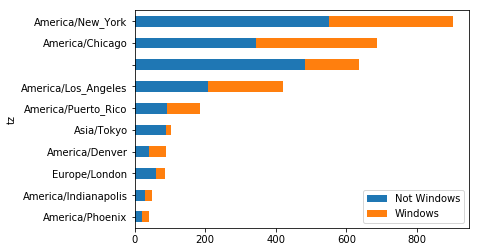

In [45]:
count_subset.plot(kind='barh', stacked=True)

converet the value into percentage

In [46]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)

In [156]:
normed_subset

,Not Windows,Windows
tz,,
America/Phoenix,0.550000,0.450000
America/Indianapolis,0.580000,0.420000
Europe/London,0.729412,0.270588
America/Denver,0.460674,0.539326
Asia/Tokyo,0.862745,0.137255
America/Puerto_Rico,0.505435,0.494565
America/Los_Angeles,0.491686,0.508314
,0.761006,0.238994
America/Chicago,0.500000,0.500000


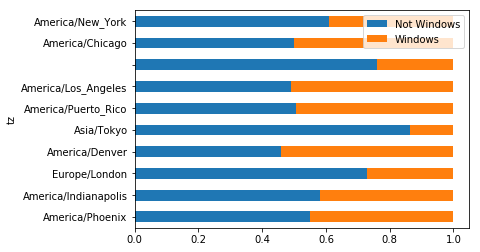

In [48]:
normed_subset.plot(kind='barh', stacked=True)